In [16]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
df = pd.read_csv("./data/diabetes.csv")
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


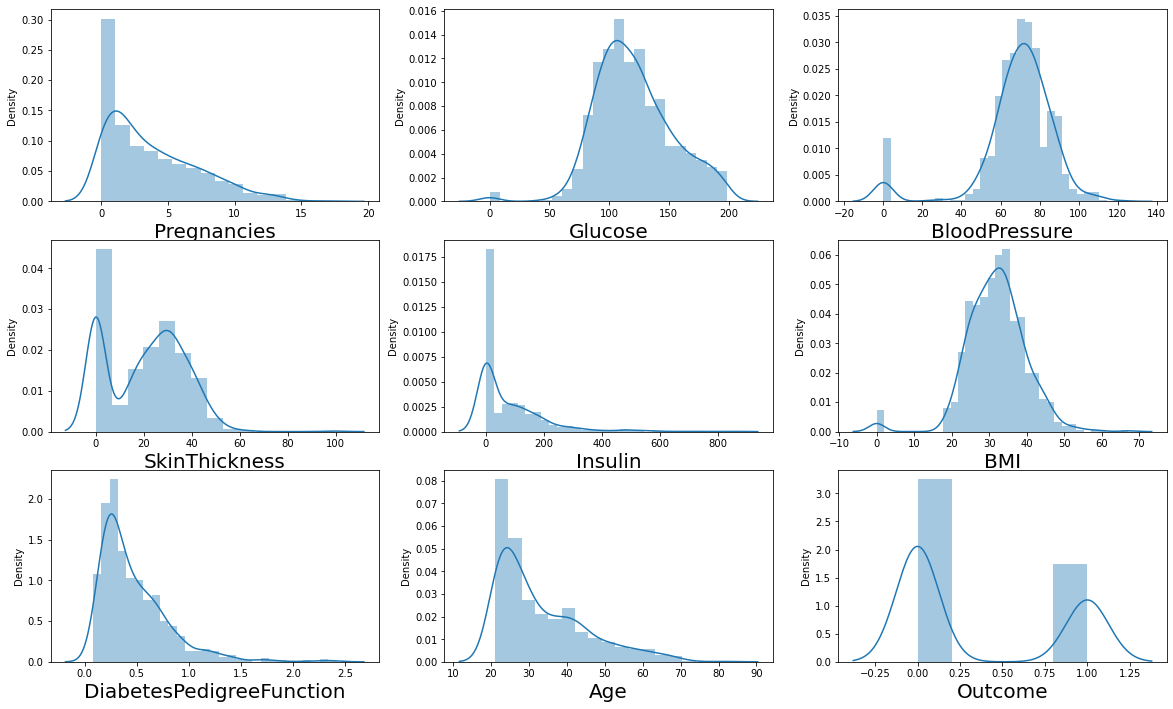

In [7]:
plt.figure(figsize=(20,12), facecolor='white')
plot_number = 1

for column in  df:
    if plot_number <= 9:
        ax = plt.subplot(3,3,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)

    plot_number += 1
plt.show()

In [8]:
def replace_mean(column):
    return df[column].replace(0,df[column].mean())

non_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in non_zero_cols:
    df[i] = replace_mean(i)



<AxesSubplot:>

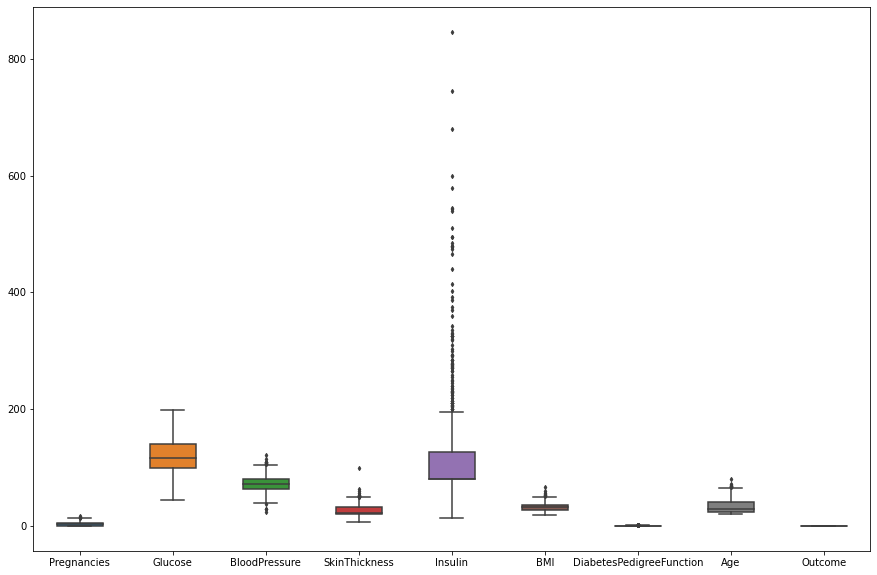

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)

In [10]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = df[df['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]


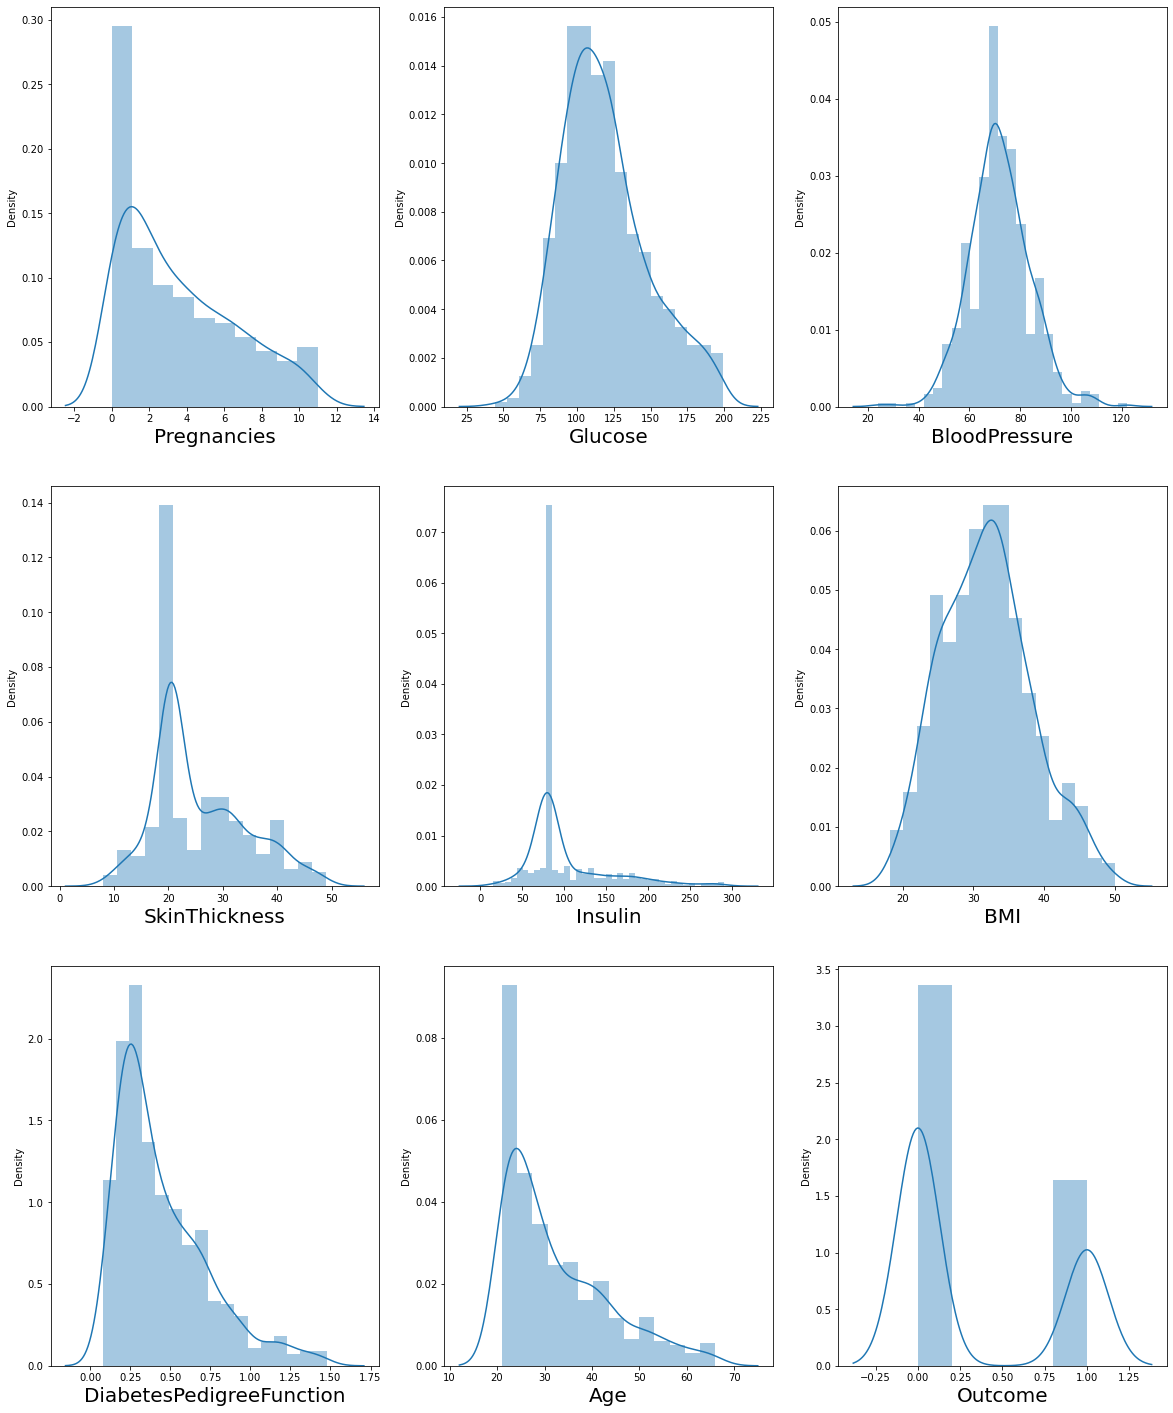

In [11]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [14]:
X = data_cleaned.drop(columns = ['Outcome'])
y = data_cleaned['Outcome']

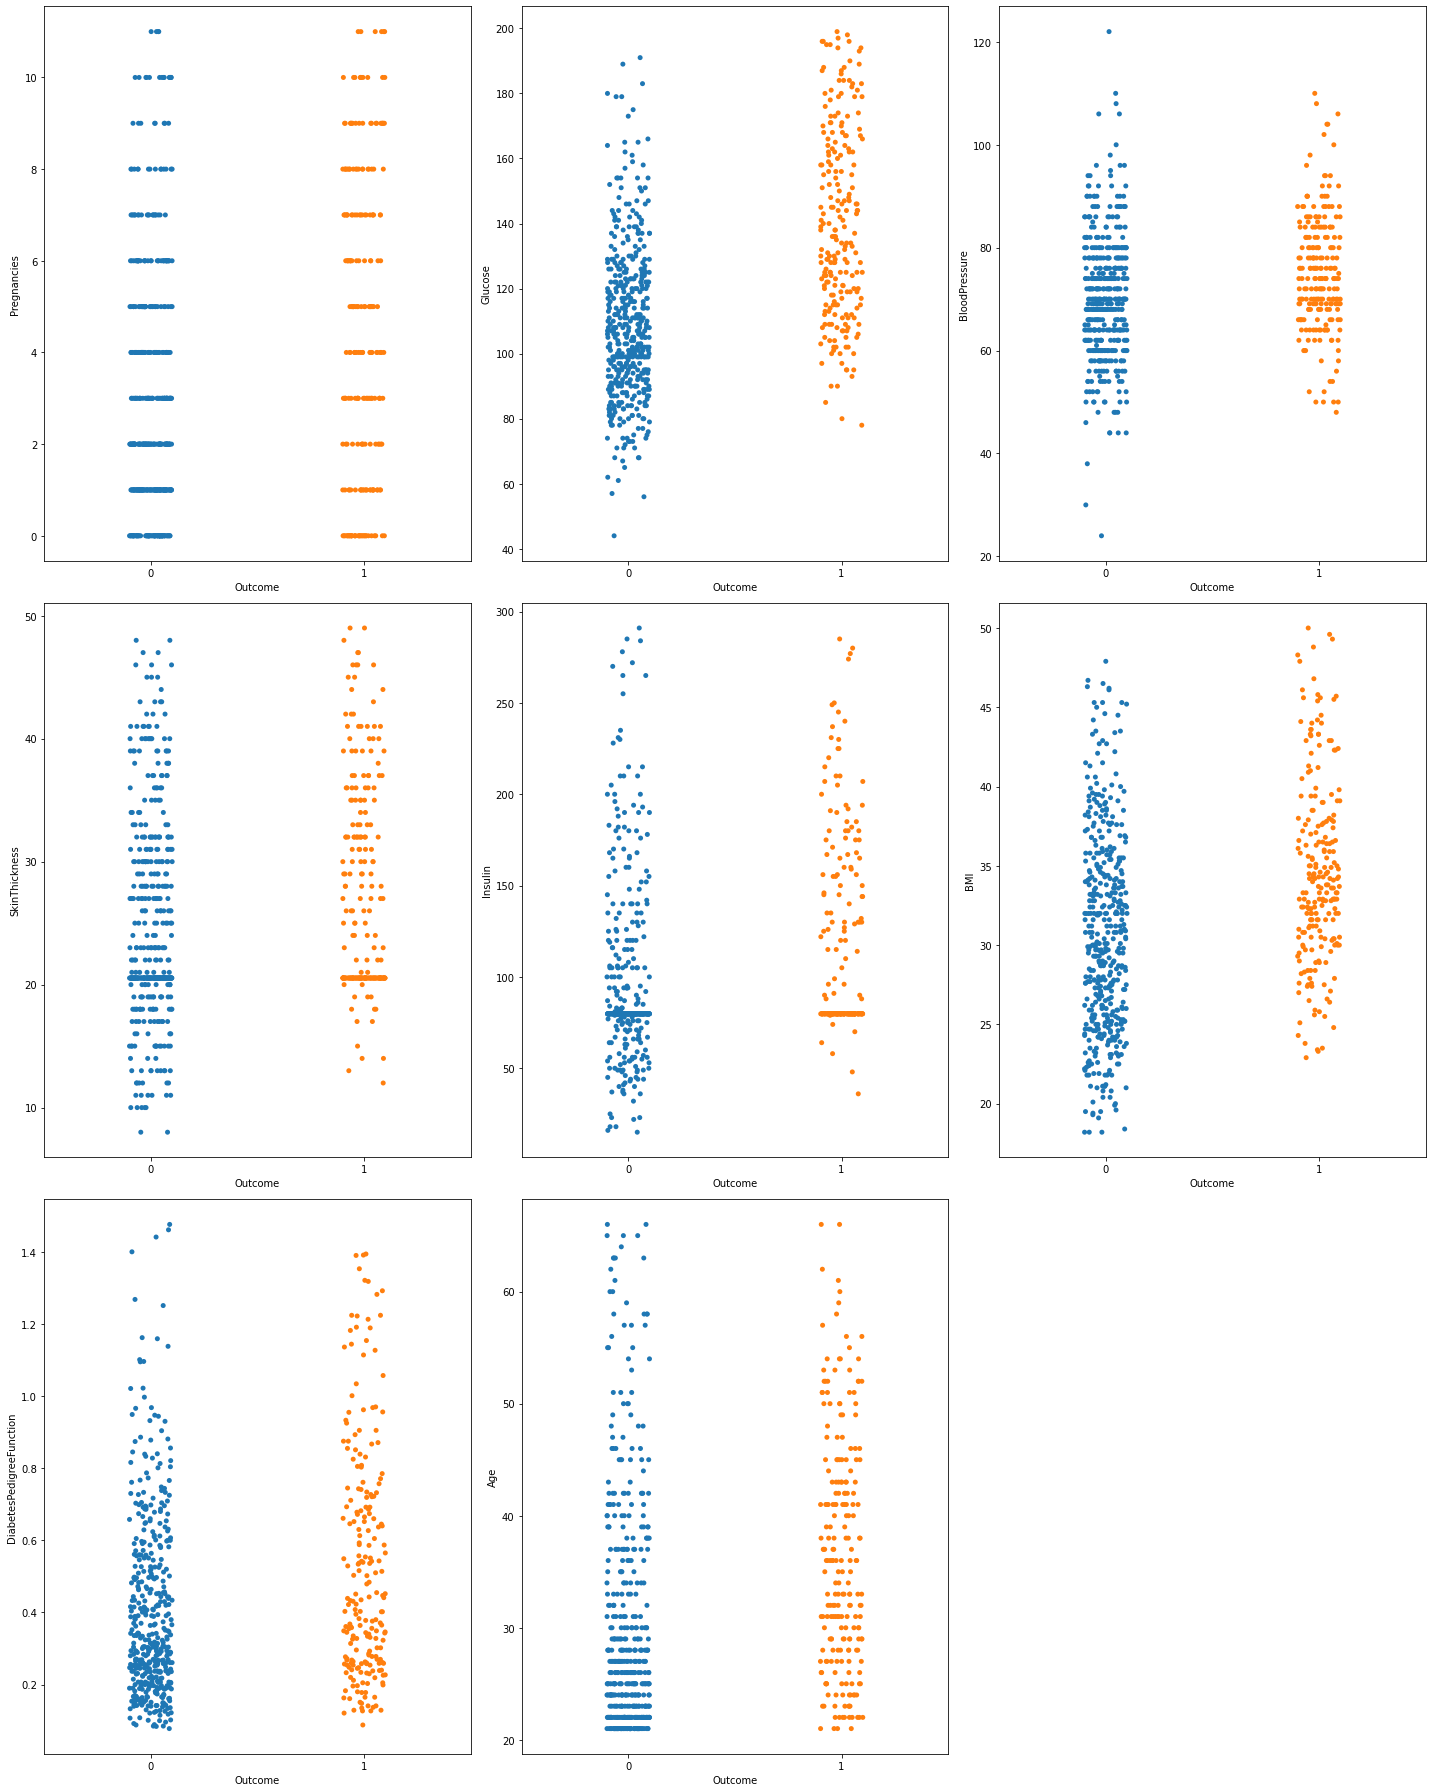

In [15]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [18]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [19]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [21]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
conf_mat = confusion_matrix(y_test,y_pred)

0.834319526627219


In [23]:
conf_mat

array([[109,   8],
       [ 20,  32]], dtype=int64)

In [24]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [25]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.834319526627219

In [26]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9316239316239316

In [27]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8449612403100775

In [28]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8861788617886178